<p><font size="6"><b>Practice Case 05 & 06</b></font></p>


> *Supervised and Unsupervised Learning*  

> *Author: Herdis Haerusalam*<br>
> *Date : 11 November 2019*


---

In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from math import sqrt
import seaborn as sns

import matplotlib.pyplot as plt

import os
%matplotlib inline

In [50]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Read dataset and Preprocessing

In [51]:
print(os.getcwd())
print(os.listdir(os.getcwd()))
print(next(os.walk('dataset')))

C:\Users\herdis.haerusalam\Documents\DSA\iykra\DAY_15
['.ipynb_checkpoints', 'dataset', 'Practice_Case_05_06.ipynb']
('dataset', [], ['sample_prediction.csv', 'test.csv', 'train.csv'])


In [199]:
data_sample = pd.read_csv('dataset/sample_prediction.csv')
data_train = pd.read_csv('dataset/train.csv') #train data
data_test = pd.read_csv('dataset/test.csv') #testing data

In [53]:
data_train.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.16,0.82,6,202,4,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.43,0.48,2,153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.39,0.54,2,127,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0.73,1.00,5,253,6,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0.44,0.46,2,149,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [54]:
data_test.head()

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
0,0.66,0.62,4,250,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.66,0.50,4,263,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.32,0.74,3,211,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.37,0.57,2,155,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.41,0.49,2,130,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [55]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
att1     8000 non-null float64
att2     8000 non-null float64
att3     8000 non-null int64
att4     8000 non-null int64
att5     8000 non-null int64
att6     8000 non-null int64
att7     8000 non-null int64
att8a    8000 non-null int64
att8b    8000 non-null int64
att8c    8000 non-null int64
att8d    8000 non-null int64
att8e    8000 non-null int64
att8f    8000 non-null int64
att8g    8000 non-null int64
att8h    8000 non-null int64
att8i    8000 non-null int64
att8j    8000 non-null int64
att9a    8000 non-null int64
att9b    8000 non-null int64
att9c    8000 non-null int64
att10    8000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 1.3 MB


In [56]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
att1,8000.0,0.612260,0.248338,0.09,0.44,0.64,0.82,1.0
att2,8000.0,0.717594,0.170957,0.36,0.56,0.72,0.87,1.0
att3,8000.0,3.791375,1.230463,2.00,3.00,4.00,5.00,7.0
att4,8000.0,201.245000,49.837947,96.00,156.00,201.00,245.00,310.0
att5,8000.0,3.486375,1.446055,2.00,3.00,3.00,4.00,10.0
att6,8000.0,0.145375,0.352501,0.00,0.00,0.00,0.00,1.0
att7,8000.0,0.020625,0.142134,0.00,0.00,0.00,0.00,1.0
att8a,8000.0,0.080125,0.271504,0.00,0.00,0.00,0.00,1.0
att8b,8000.0,0.053875,0.225785,0.00,0.00,0.00,0.00,1.0
att8c,8000.0,0.050750,0.219500,0.00,0.00,0.00,0.00,1.0


There are questions about `Supervised Learning` and `Unsupervised Learning`.<br>

> **Supervised Learning**
1. Create classifiers from train.csv data, in order to predict att10 as label based on the
rest of the attributes. Use at least 5 algorithms <br> (`k-NN`, `Decision Tree`, `Logistic
Regression`, `Voting`, `Averaging`, `Bagging`, `Random Forest`, `Averaging`, `Voting`, `AdaBoost`,
`XGBoost`, `LightGBM`, `CatBoost`, or `Stacking`).<br>
Use AUC for your model evaluation
performance. 
2. Choose the best Classifier based on highest AUC and use it for predicting the `test.csv`
data. 

> **Unsupervised Learning**
1. Select `att1` and `att2` from `train.csv` and `test.csv` data. This step will result a new data
frame or a table with size of 10,000 rows and 2 columns. Perform clustering using at
least 3 algorithms (`K-Means Clustering`, `Hierarchical Clustering`, and `DBSCAN`) to
cluster that new data frame. 
2.  Assume that the dataset you are working is the employee data, whether <br>
`att1` is satisfaction level (the higher the satisfaction level, the more satisfy a person
does in his employment)<br>
`att2` is evaluation result (the higher the evaluation result, the better/harder a person
works in the company).

In [57]:
data_train.shape

(8000, 21)

In [58]:
data_test.shape

(2000, 20)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(data_train.drop(['att10'], axis=1), 
                                                    data_train['att10'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Supervised Learning

## Logistic Regression

Confusion matrix
[[1136   97]
 [ 220  147]]


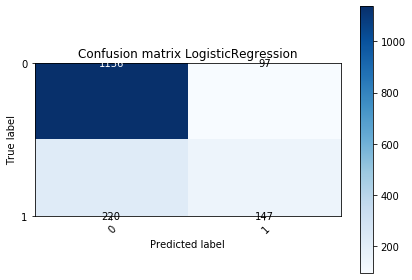

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1233
           1       0.60      0.40      0.48       367

    accuracy                           0.80      1600
   macro avg       0.72      0.66      0.68      1600
weighted avg       0.78      0.80      0.79      1600

AUC Score LogisticRegression = 0.6609375241706832


In [60]:
from sklearn.linear_model import LogisticRegression

# Binarize the output
y = label_binarize(data_train['att10'], classes=[0, 1, 2])
n_classes = y.shape[1]

model_lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
model_lr.fit(x_train, y_train)
y_pred_test = model_lr.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_lr = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_lr.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_lr.__class__.__name__, auc_lr))

## Decision Tree

Confusion matrix
[[1210   23]
 [  17  350]]


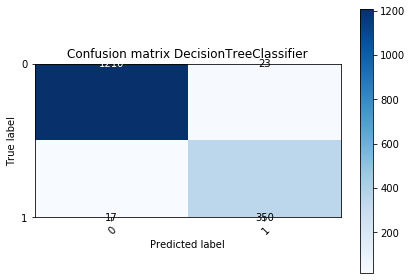

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1233
           1       0.94      0.95      0.95       367

    accuracy                           0.97      1600
   macro avg       0.96      0.97      0.96      1600
weighted avg       0.98      0.97      0.98      1600

AUC Score DecisionTreeClassifier = 0.9675123919639522


In [61]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

y_pred_test = model_dt.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_dt = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_dt.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_dt.__class__.__name__, auc_dt))

##  KNN

Confusion matrix
[[1154   79]
 [  30  337]]


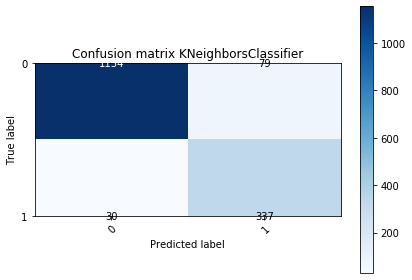

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1233
           1       0.81      0.92      0.86       367

    accuracy                           0.93      1600
   macro avg       0.89      0.93      0.91      1600
weighted avg       0.94      0.93      0.93      1600

AUC Score KNeighborsClassifier = 0.9270923800747386


In [65]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')
model_knn.fit(x_train, y_train)

y_pred_test = model_knn.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_knn = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_knn.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_knn.__class__.__name__, auc_knn))


## Voting

Confusion matrix
[[1206   27]
 [  26  341]]


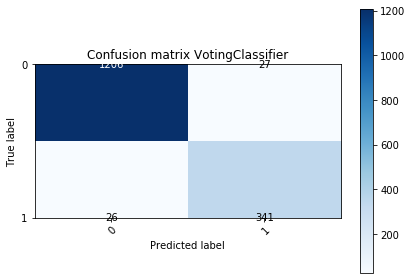

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1233
           1       0.93      0.93      0.93       367

    accuracy                           0.97      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.97      0.97      0.97      1600

AUC Score VotingClassifier = 0.9536287515662604


In [66]:
from sklearn.ensemble import VotingClassifier

# Create voting classifier
model_voting = VotingClassifier(estimators=[
('lr', model_lr),
('dt', model_dt),
('knn', model_knn)])

# Fit it to the training set and predict
model_voting.fit(x_train, y_train)
y_pred_test = model_voting.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_voting = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_voting.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_voting.__class__.__name__, auc_voting))


## Averaging

Confusion matrix
[[1214   19]
 [  20  347]]


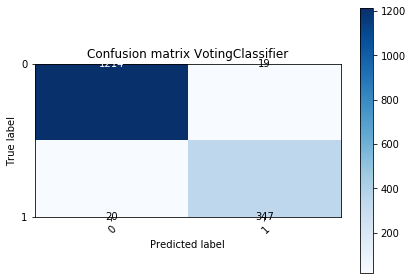

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1233
           1       0.95      0.95      0.95       367

    accuracy                           0.98      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.98      0.98      0.98      1600

AUC Score VotingClassifier = 0.9650472585196824


In [68]:
model_avg = VotingClassifier(
estimators=[
('lr', model_lr),
('dt', model_dt),
('knn', model_knn)],
voting='soft'
)

# Fit it to the training set and predict
model_avg.fit(x_train, y_train)
y_pred_test = model_avg.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_avg = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_avg.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_avg.__class__.__name__, auc_avg))


## Bagging

Confusion matrix
[[1219   14]
 [  43  324]]


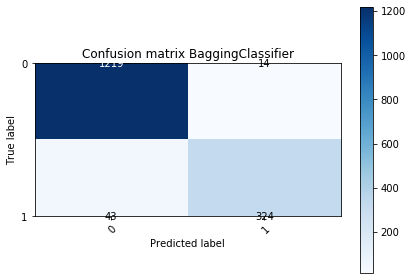

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1233
           1       0.96      0.88      0.92       367

    accuracy                           0.96      1600
   macro avg       0.96      0.94      0.95      1600
weighted avg       0.96      0.96      0.96      1600

AUC Score BaggingClassifier = 0.9357396836761981


In [76]:
from sklearn.ensemble import BaggingClassifier

model_bagging = BaggingClassifier(base_estimator= model_knn,
                                   max_samples=0.5, max_features=0.5)

# Fit it to the training set and predict
model_bagging.fit(x_train, y_train)
y_pred_test = model_bagging.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_bagging = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_bagging.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_bagging.__class__.__name__, auc_bagging))

## Random Forest

Confusion matrix
[[1226    7]
 [ 211  156]]


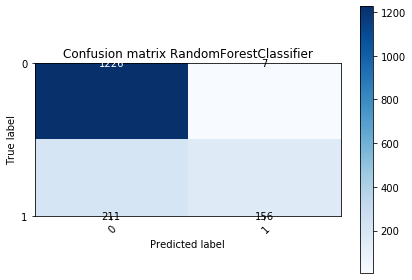

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1233
           1       0.96      0.43      0.59       367

    accuracy                           0.86      1600
   macro avg       0.91      0.71      0.75      1600
weighted avg       0.88      0.86      0.84      1600

AUC Score RandomForestClassifier = 0.709695454917118


In [79]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)

# Fit it to the training set and predict
model_rf.fit(x_train, y_train)
y_pred_test = model_rf.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_rf = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_rf.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_rf.__class__.__name__, auc_rf))

## Adaboost

Confusion matrix
[[1204   29]
 [  29  338]]


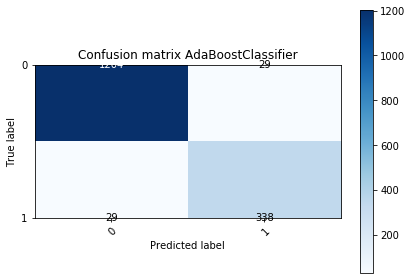

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1233
           1       0.92      0.92      0.92       367

    accuracy                           0.96      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.96      0.96      0.96      1600

AUC Score AdaBoostClassifier = 0.9487305280976596


In [80]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=1
    )


# Fit it to the training set and predict
model_ada.fit(x_train, y_train)
y_pred_test = model_ada.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_ada = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_ada.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_ada.__class__.__name__, auc_ada))

## XGboost

Confusion matrix
[[1211   22]
 [  28  339]]


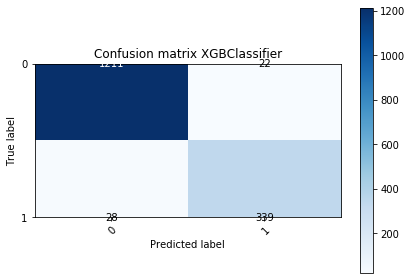

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1233
           1       0.94      0.92      0.93       367

    accuracy                           0.97      1600
   macro avg       0.96      0.95      0.96      1600
weighted avg       0.97      0.97      0.97      1600

AUC Score XGBClassifier = 0.952931530946209


In [84]:
import xgboost as xgb

model_xgb =xgb.XGBClassifier(random_state=42,learning_rate=0.01)

# Fit it to the training set and predict
model_xgb.fit(x_train, y_train)
y_pred_test = model_xgb.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_xgb = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_xgb.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_xgb.__class__.__name__, auc_xgb))

## Stacking

Confusion matrix
[[1212   21]
 [  17  350]]


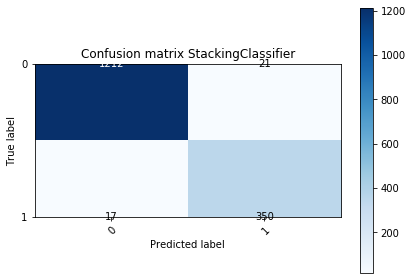

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1233
           1       0.94      0.95      0.95       367

    accuracy                           0.98      1600
   macro avg       0.96      0.97      0.97      1600
weighted avg       0.98      0.98      0.98      1600

AUC Score StackingClassifier = 0.9683234219720626


In [109]:
from mlxtend.classifier import StackingClassifier

# Build the Stacking classifier
model_stacking = StackingClassifier(classifiers=[model_dt, model_ada, model_xgb, model_avg, model_voting], 
                          meta_classifier=model_lr,
                          use_probas=False,
                          use_features_in_secondary=False
                         )

model_stacking.fit(x_train, y_train)
y_pred_test = model_stacking.predict(x_test)

report = classification_report(y_test, y_pred_test)
auc_stacking = roc_auc_score(y_test, y_pred_test)

np.set_printoptions(precision=2)

class_names = y_train.unique()
plot_confusion_matrix(y_test, y_pred_test, classes=class_names,
                      title='Confusion matrix {}'.format(model_stacking.__class__.__name__))

plt.show()

print(report)
print('AUC Score {} = {}'.format(model_stacking.__class__.__name__, auc_stacking))

<div class="alert alert-warning">

 <ul>
  <li>The best Classifier based on highest AUC is Stacking with AUC Score 0.968 </li>
</ul> 

</div>

## Predicting the `test.csv`

In [200]:
# Build the Stacking classifier
model_stacking = StackingClassifier(classifiers=[model_dt, model_ada, model_xgb, model_avg, model_voting], 
                          meta_classifier=model_lr
                         )
model_stacking.fit(x_train, y_train)
y_pred_test = model_stacking.predict(data_test)
y_pred_test_proba = model_stacking.predict_proba(data_test)


In [201]:
y_pred_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [204]:
y_pred_test_proba

array([[9.99e-01, 1.35e-03],
       [9.99e-01, 1.35e-03],
       [9.99e-01, 1.35e-03],
       ...,
       [9.41e-04, 9.99e-01],
       [9.99e-01, 1.35e-03],
       [9.99e-01, 1.35e-03]])

In [209]:
type(y_pred_test_proba[:,1])

numpy.ndarray

In [207]:
data_test['pred'] = y_pred_test
data_test['pred_proba'] = y_pred_test_proba[:,1]

In [208]:
data_test

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,pred,pred_proba
0,0.66,0.62,4,250,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.001354
1,0.66,0.50,4,263,3,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.001354
2,0.32,0.74,3,211,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0.001354
3,0.37,0.57,2,155,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0.999059
4,0.41,0.49,2,130,3,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0.999059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.53,0.70,4,243,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0.001354
1996,0.66,0.67,2,255,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0.973514
1997,0.40,0.46,2,132,3,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0.999059
1998,0.24,0.76,6,213,4,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.001354


In [212]:
data_export = data_test[['pred', 'pred_proba']]
data_export.to_csv('data_pred_proba.csv')

# Unsupervised Learning

In [214]:
data_un = pd.concat([data_train,data_test])
data_un = data_un[['att1','att2']]
data_un.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,att1,att2
0,0.16,0.82
1,0.43,0.48
2,0.39,0.54
3,0.73,1.00
4,0.44,0.46


## K-means

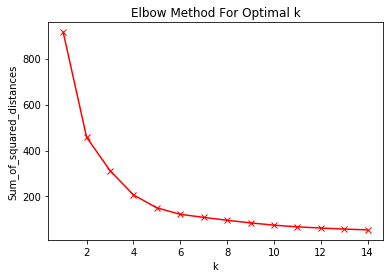

In [219]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_un)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<div class="alert alert-warning">

 <ul>
  <li>Based on the elbow method, the best total cluster is 4 </li>
</ul> 

</div>

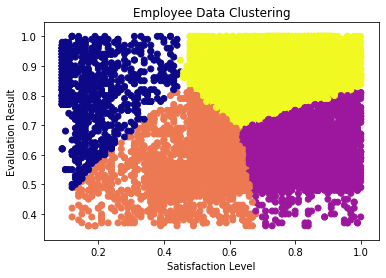

In [235]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(data_un)
plt.scatter(data_un['att1'],data_un['att2'], c=kmeans.labels_, cmap='plasma')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Clustering")
plt.show()

## Hierarchical Clustering

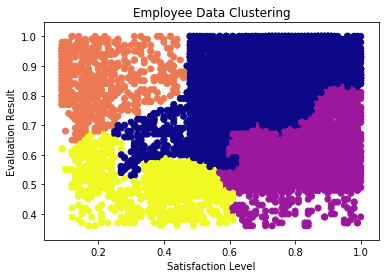

In [231]:
model_hier = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_hier.fit(data_un)
plt.scatter(data_un['att1'],data_un['att2'], c=model_hier.labels_, cmap='plasma')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Clustering")
plt.show()

<div class="alert alert-info">

**Kmeans and  Hierarchical Clustering**

  <ul>
    <li>The results from both of clustering show us about how we sepatare the Employee, we can separate the employee to 4 clusters which are the the low satisfactory with low evaluation, low satisfactory with high evaluation, high satisfactory with low evaluation, and high satisfactory with high evaluation.</li>
  </ul> 


</div>

## DBSCAN

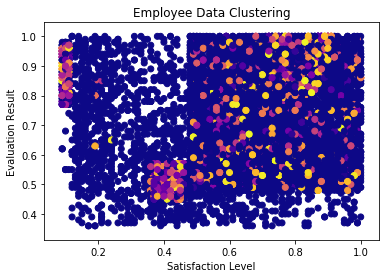

In [234]:
model_dbscan = DBSCAN(eps=0.00001)
model_dbscan.fit(data_un)
plt.scatter(data_un['att1'],data_un['att2'], c=model_dbscan.labels_, cmap='plasma')
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation Result")
plt.title("Employee Data Clustering")
plt.show()

<div class="alert alert-info">

**DBSCAN**

  <ul>
    <li> We cannot see any insight from the data</li>
  </ul> 


</div>